# Logistic Regression

### Standard Distributed Function

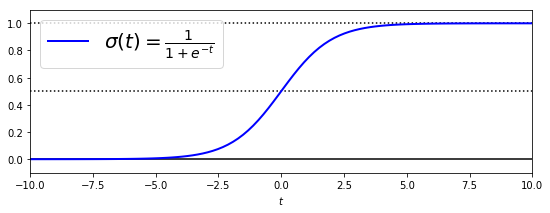

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel(r"$t$")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### Probablity Density Function

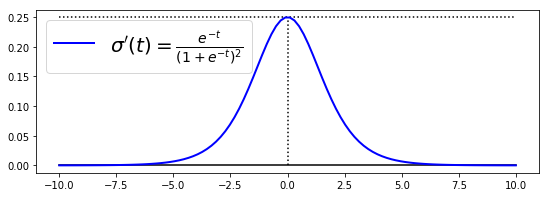

In [3]:
der = np.exp(-t) / np.square(1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.25, 0.25], "k:")
plt.plot([0, 0], [0.0, 0.25], "k:")
plt.plot(t, der, "b-", linewidth=2, 
         label=r"$\sigma'(t)= \frac{e^{-t}}{(1 + e^{-t})^2}$")
plt.legend(loc="upper left", fontsize=20)
plt.show()

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [6]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)    # 1 if Iris-Virginica, else 0

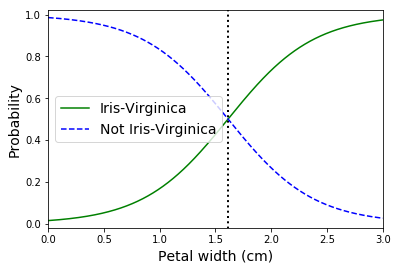

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [8]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
softmax_reg.predict([[5, 2]])

array([2])

In [10]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134079e-07, 5.75276066e-02, 9.42471760e-01]])

### Logistic Regression with Spark

In [11]:
from sklearn.datasets import load_svmlight_file

path = "classification/data/sample_binary_classification_data.txt"
X, y = load_svmlight_file(path)